In [2]:
from sklearn import linear_model
import pandas as pd
import numpy as np

data=pd.read_csv('product_adme.csv')

C:\Users\joaof\Anaconda3\envs\py36\lib\site-packages\IPython\core\interactiveshell.py:2785: DtypeWarning: Columns (24,26,29,30,61,63,69,74,75,76,101,103,108,109) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


# aqui é feito o texto

In [20]:
data=data.drop(columns=['md', 'cp','cr','at','aa','molregno.2','molregno.1','doc_id.1','doc_id.2','molregno.3','doc_id.1','doc_id.2'])
data=data.drop(columns=['src_id.1','chembl_id.1','assay_id.1','record_id.1'])


In [21]:
data.dtypes

molregno                        int64
pref_name                      object
chembl_id                      object
max_phase                       int64
therapeutic_flag                int64
dosed_ingredient                int64
structure_type                 object
chebi_par_id                  float64
molecule_type                  object
first_approval                float64
oral                            int64
parenteral                      int64
topical                         int64
black_box_warning               int64
natural_product                 int64
first_in_class                  int64
chirality                       int64
prodrug                         int64
inorganic_flag                  int64
usan_year                     float64
availability_type               int64
usan_stem                      object
polymer_flag                    int64
usan_substem                   object
usan_stem_definition           object
indication_class               object
withdrawn_fl

In [25]:
data['published_type'].describe()

count     352124
unique       308
top         logP
freq       38680
Name: published_type, dtype: object

In [27]:
data[data["published_type"] == "logP"]

,molregno,pref_name,chembl_id,max_phase,therapeutic_flag,dosed_ingredient,structure_type,chebi_par_id,molecule_type,first_approval,...,standard_type,activity_comment,published_type,data_validity_comment,potential_duplicate,published_relation,pchembl_value,bao_endpoint,uo_units,qudt_units
0,170,NaN,CHEMBL263777,0,0,0,MOL,NaN,Small molecule,NaN,...,Eye toxicity,No toxicity,Eye toxicity,NaN,0,NaN,NaN,NaN,NaN,NaN
1,184,NaN,CHEMBL6227,0,0,0,MOL,NaN,Small molecule,NaN,...,Eye toxicity,No toxicity,Eye toxicity,NaN,0,NaN,NaN,NaN,NaN,NaN
2,185,NaN,CHEMBL6242,0,0,0,MOL,NaN,Small molecule,NaN,...,Eye toxicity,No toxicity,Eye toxicity,NaN,0,NaN,NaN,NaN,NaN,NaN
3,197,NaN,CHEMBL448105,0,0,0,BOTH,NaN,Protein,NaN,...,Eye toxicity,No toxicity,Eye toxicity,NaN,0,NaN,NaN,NaN,NaN,NaN
4,198,SC-58272,CHEMBL6269,0,0,0,MOL,NaN,Small molecule,NaN,...,Eye toxicity,No toxicity,Eye toxicity,NaN,0,NaN,NaN,NaN,NaN,NaN
5,187,NaN,CHEMBL6251,0,0,0,MOL,NaN,Small molecule,NaN,...,T1/2,NaN,T1/2,NaN,0,=,NaN,BAO_0002115,UO_0000032,http://qudt.org/vocab/unit#Hour
6,189,NaN,CHEMBL263074,0,0,0,MOL,NaN,Small molecule,NaN,...,T1/2,NaN,T1/2,NaN,0,=,NaN,BAO_0002115,UO_0000032,http://qudt.org/vocab/unit#Hour
7,190,NaN,CHEMBL6267,0,0,0,MOL,NaN,Small molecule,NaN,...,T1/2,NaN,T1/2,NaN,0,=,NaN,BAO_0002115,UO_0000032,http://qudt.org/vocab/unit#Hour
8,188,NaN,CHEMBL440577,0,0,0,MOL,NaN,Small molecule,NaN,...,T1/2,NaN,T1/2,NaN,0,=,NaN,BAO_0002115,UO_0000032,http://qudt.org/vocab/unit#Hour
9,191,NaN,CHEMBL6285,0,0,0,MOL,NaN,Small molecule,NaN,...,T1/2,NaN,T1/2,NaN,0,=,NaN,BAO_0002115,UO_0000032,http://qudt.org/vocab/unit#Hour


In [28]:
data.hist(column="published_type")

ValueError: num must be 1 <= num <= 0, not 1

para histograma é hist
para barplot é:

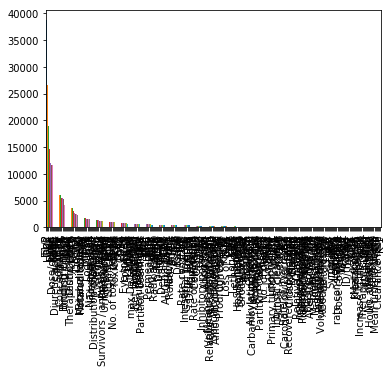

In [29]:
data["published_type"].value_counts().plot(kind='bar')

logP                 38680
T1/2                 26557
LD50                 18911
pKa                  14644
Dose                 12041
Dose/organ           11747
Ratio                11695
logD                 10547
clogP                 8384
Diuretic activity     6872
IC50                  6605
Solubility            6460
Toxicity              6019
Concentration         5992
F                     5484
S                     5472
Biodistribution       5298
Binding energy        4234
TD50                  4150
LD10                  3957
Cmax                  3948
AUC                   3925
Distribution          3862
Therapeutic index     3677
Log S                 3597
Activity              3043
TI                    2655
Log K                 2521
Dose/g                2466
Ki                    2259
k'                    2178
Bioavailabiility      2085
Name: published_type, dtype: int64

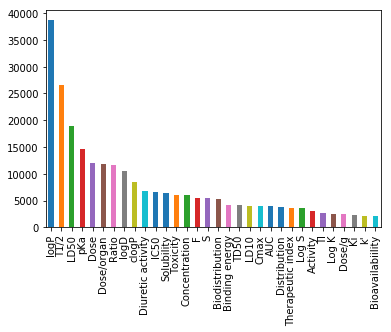

In [37]:
teste=data.groupby("published_type").filter(lambda x: len(x) > 2000)
teste["published_type"].value_counts().plot(kind='bar')
teste["published_type"].value_counts()